In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd



--- Exponential decay fit ---
Slope = -0.025
Tau = 40.524
t_1_100 = 186.62
ΔU = 0.0
ΔK (mean) = 0.0
ΔE (mean) = 0.0


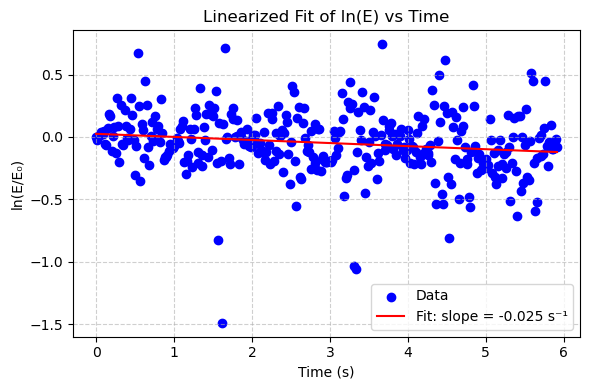

In [38]:


# --- Read CSV ---
csv_data = pd.read_csv("energy_pendulum.csv")

# --- Constants ---
m = 0.02
g = 9.81

# --- Extract data ---
t = csv_data["t"]
y = csv_data["y"]
vx = csv_data["vx"]
vy = csv_data["vy"]

# --- Calculate speed and energies ---
v = np.sqrt(vx**2 + vy**2)
U = m * g * y
K = 0.5 * m * v**2
E = U + K

# --- Uncertainty estimates ---
delta_y = 0.001  # position uncertainty (m)
delta_v = 0.01   # velocity uncertainty (m/s)

delta_U = m * g * delta_y                # constant
delta_K = m * v * delta_v                # pointwise uncertainty
delta_E = np.sqrt(delta_U**2 + delta_K**2)

# --- Normalize energy for exponential decay fit ---
E_norm = E / E.iloc[0]
mask = E_norm > 0
lnE = np.log(E_norm[mask])
t_fit = t[mask] - t[mask].iloc[0]

# --- Linear regression (lnE vs t) ---
slope, intercept = np.polyfit(t_fit, lnE, 1)
tau = -1 / slope
t_1_100 = tau * np.log(100)

print("\n--- Exponential decay fit ---")
print("Slope =", round(slope, 3))
print("Tau =", round(tau, 3))
print("t_1_100 =", round(t_1_100, 3))
print("ΔU =", round(delta_U, 3))
print("ΔK (mean) =", round(np.mean(delta_K), 3))
print("ΔE (mean) =", round(np.mean(delta_E), 3))

# --- Plot linearized fit ---
plt.figure(figsize=(6,4))
plt.scatter(t_fit, lnE, color='blue', label='Data')
plt.plot(t_fit, slope * t_fit + intercept, color='red', label=f'Fit: slope = {slope:.3f} s⁻¹')
plt.xlabel('Time (s)')
plt.ylabel('ln(E/E₀)')
plt.title('Linearized Fit of ln(E) vs Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("linear_fit.jpeg", dpi=300)
plt.show()
